Latest : Model 4 accuracy 77.37% via Gradient Boosting

In [1]:
import os
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
import tensorflow as tf
print(tf.test.gpu_device_name());
print("CPU count : ",os.cpu_count());
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import librosa
import csv
from tensorflow import keras

/device:GPU:0
CPU count :  12


In [3]:
df = pd.read_csv('CSVs/unified_dataset.csv')
df = df.drop(['uuid'],axis=1)
#df = df.drop(df.columns[range(6,25)],axis=1)
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,age,gender,respiratory_condition,status
0,0.125799,0.018790,557.246888,541.449181,1236.613973,0.038685,-548.788940,23.606979,-5.905068,9.216256,...,-1.999512,-3.538264,1.217950,-2.029420,0.313303,-0.222275,15.0,1,0,0.0
1,0.418816,0.001655,2932.042041,2287.258342,5392.572021,0.322187,-701.705505,63.574074,6.485498,2.101877,...,4.290841,-7.062682,1.838967,-3.643120,-3.821690,-1.129711,46.0,0,0,0.0
2,0.394565,0.097457,1841.552611,1863.271100,3799.444895,0.088711,-279.251099,101.417145,-26.392599,16.304626,...,-9.214826,-5.784528,-1.586974,-7.638764,-6.929610,-5.573641,34.0,1,1,0.0
3,0.508658,0.051866,2905.802874,2060.310320,5379.263306,0.291334,-398.473663,51.205776,-56.377773,15.692808,...,-1.794698,-6.441534,7.364425,-4.945196,0.024016,-2.326225,21.0,1,0,0.0
4,0.090675,0.004550,265.456102,310.753467,539.426676,0.013830,-563.476257,13.822523,0.114156,5.914953,...,-1.085041,-2.185372,-1.310865,-0.790942,-0.715821,-0.834619,20.0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14477,0.512944,0.023030,3137.558994,2186.533578,5676.626587,0.268209,-484.073181,28.063210,-12.200029,10.437543,...,4.924140,1.253925,-1.383177,0.233916,-0.477571,-2.084248,16.0,1,0,0.0
14478,0.285275,0.010410,2098.124122,1878.304713,3930.258179,0.133199,-600.030029,63.579899,22.134485,18.594692,...,-2.418489,1.414832,-5.155683,-4.513929,-6.017869,-7.827081,69.0,1,0,0.0
14479,0.389768,0.016855,3141.166825,2614.720507,6443.711344,0.256569,-520.521912,4.831301,-3.302560,-1.760425,...,-1.234321,-0.769954,-1.085883,0.277529,-1.258130,1.418048,35.0,1,0,0.0
14480,0.418769,0.066166,2837.313551,1815.051664,4712.282308,0.254508,-334.125763,49.621655,-18.739819,25.851189,...,5.391032,-5.658160,-1.373990,-4.224291,-3.982193,-1.760277,31.0,0,0,0.0


In [4]:
df['status'].value_counts()

0.0    11158
1.0     3324
Name: status, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X = scaler.fit_transform(X)
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

Epoch 1/6
408/408 [==============================] - 3s 6ms/step - loss: 0.5268 - accuracy: 0.7673 - val_loss: 0.5148 - val_accuracy: 0.7702
Epoch 2/6
408/408 [==============================] - 2s 5ms/step - loss: 0.5101 - accuracy: 0.7717 - val_loss: 0.5139 - val_accuracy: 0.7681
Epoch 3/6
408/408 [==============================] - 2s 5ms/step - loss: 0.5043 - accuracy: 0.7732 - val_loss: 0.5121 - val_accuracy: 0.7798
Epoch 4/6
408/408 [==============================] - 2s 5ms/step - loss: 0.4991 - accuracy: 0.7754 - val_loss: 0.5142 - val_accuracy: 0.7792
Epoch 5/6
408/408 [==============================] - 2s 5ms/step - loss: 0.4935 - accuracy: 0.7790 - val_loss: 0.5157 - val_accuracy: 0.7743
Epoch 6/6
408/408 [==============================] - 2s 5ms/step - loss: 0.4891 - accuracy: 0.7816 - val_loss: 0.5197 - val_accuracy: 0.7764


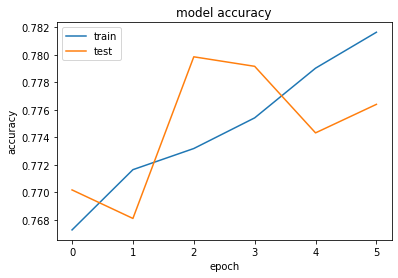

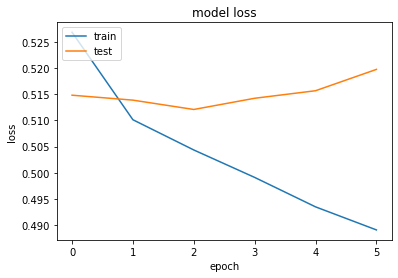

In [5]:
history = model.fit(X,Y.values,epochs=6,validation_split=0.1)
loss = history.history['loss']
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']
epochs = range(len(history.history['loss']))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
model.save('Models/model3.h5')

# Gradient Boosting Classifier
GBM will require separate train and test datafiles with the same ratio of classes as the original data

In [17]:
# separating positive and negative values
positive = []
negative = []
for i in range(len(df)) :
    if df['status'][i] == 1 :
        positive.append(df.iloc[i,:])
    else :
        negative.append(df.iloc[i,:])

3324

In [6]:
# adding 80% values to train and rest to test
positive = pd.DataFrame(positive)
negative = pd.DataFrame(negative)
train = []
test = []
for i in range(len(positive)) :
    if i<= 0.8*len(positive) :
        train.append(positive.iloc[i,:])
    else :
        test.append(positive.iloc[i,:])
for i in range(len(negative)) :
    if i<= 0.8*len(negative) :
        train.append(negative.iloc[i,:])
    else :
        test.append(negative.iloc[i,:])
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [7]:
# shuffling the values of the train and test data
train = train.sample(frac=1)
test = test.sample(frac=1)
train.to_csv("train_dataset.csv",index=False)
test.to_csv("test_dataset.csv",index=False)

In [2]:
# implementing GradientBoostingClassifier
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1]
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=150,learning_rate=1.0,max_depth=1,random_state=0).fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.7713298791018999

In [ ]:
# testing all combinations of hyperparameters
estimator_values = [100,125,150,200,225,250,300]
learning_rate_values = [0.5,1.5,1.75,2.0]
max_depth_values = [1,2,3,4]
for estimator_value in estimator_values :
    for learning_rate_value in learning_rate_values :
        for max_depth_value in max_depth_values :
            clf = GradientBoostingClassifier(n_estimators=estimator_value,learning_rate=learning_rate_value,max_depth=max_depth_value,random_state=0).fit(X_train,Y_train)
            print("For nestimators : ",estimator_value," learning rate : ",learning_rate_value," max depth : ",max_depth_value)
            print("accuracy is ",clf.score(X_test,Y_test))
# For nestimators :  200  learning rate :  0.5  max depth :  1 accuracy is  0.7737478411053541

In [3]:
clf = GradientBoostingClassifier(n_estimators=200,learning_rate=0.5,max_depth=1,random_state=0).fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.7737478411053541

In [12]:

clf.predict([list(X_test.iloc[1,:])])

array([0.])

In [17]:
import pickle
pickle.dump(clf,open("Model4.sav","wb"))

In [10]:
import pickle
clf = pickle.load(open("Models/Model4_GBM.sav",'rb'))
clf.score(X_test,Y_test)

0.7737478411053541

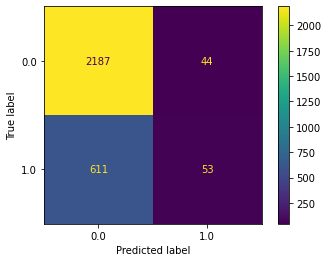

In [15]:
from sklearn import metrics
Y_preds = clf.predict(X_test)
cm = metrics.confusion_matrix(Y_test,Y_preds)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

# SVM
accuracy obtained : 77.06%

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sc = StandardScaler()
sc.fit(X_train)
X_scaled = sc.transform(X_train)
X_test = sc.transform(X_test)
svm = SVC(kernel='linear',random_state=1,C=0.1)
svm.fit(X_scaled,Y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [24]:
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.7706390328151986


In [39]:
kernels = ['linear','poly','rbf','sigmoid']
temp = [i for i in range(1,11)]
C_values = [i/10 for i in temp]
results = {}
for kernel_value in kernels :
    svm = SVC(kernel=kernel_value,random_state=1,C=0.1)
    svm.fit(X_scaled,Y_train)
    y_pred = svm.predict(X_test)
    score = accuracy_score(Y_test,y_pred)
    print("kernel : ",kernel_value)
    print("score : ",score)

kernel :  linear
score :  0.7706390328151986
kernel :  poly
score :  0.7706390328151986
kernel :  rbf
score :  0.7706390328151986
kernel :  sigmoid
score :  0.7492227979274612


# CNN based model

In [2]:
import pandas as pd
df = pd.read_csv('CSVs/unified_dataset.csv')
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,age,gender,respiratory_condition,uuid,status
0,0.125799,0.018790,557.246888,541.449181,1236.613973,0.038685,-548.788940,23.606979,-5.905068,9.216256,...,-3.538264,1.217950,-2.029420,0.313303,-0.222275,15.0,1,0,00039425-7f3a-42aa-ac13-834aaa2b6b92,0.0
1,0.418816,0.001655,2932.042041,2287.258342,5392.572021,0.322187,-701.705505,63.574074,6.485498,2.101877,...,-7.062682,1.838967,-3.643120,-3.821690,-1.129711,46.0,0,0,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,0.0
2,0.394565,0.097457,1841.552611,1863.271100,3799.444895,0.088711,-279.251099,101.417145,-26.392599,16.304626,...,-5.784528,-1.586974,-7.638764,-6.929610,-5.573641,34.0,1,1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.0
3,0.508658,0.051866,2905.802874,2060.310320,5379.263306,0.291334,-398.473663,51.205776,-56.377773,15.692808,...,-6.441534,7.364425,-4.945196,0.024016,-2.326225,21.0,1,0,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,0.0
4,0.090675,0.004550,265.456102,310.753467,539.426676,0.013830,-563.476257,13.822523,0.114156,5.914953,...,-2.185372,-1.310865,-0.790942,-0.715821,-0.834619,20.0,1,1,001e2f19-d81c-4029-b33c-d2db56b23a4a,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14477,0.512944,0.023030,3137.558994,2186.533578,5676.626587,0.268209,-484.073181,28.063210,-12.200029,10.437543,...,1.253925,-1.383177,0.233916,-0.477571,-2.084248,16.0,1,0,f3abf042-e22d-4e27-af5b-6650cc8f4883,0.0
14478,0.285275,0.010410,2098.124122,1878.304713,3930.258179,0.133199,-600.030029,63.579899,22.134485,18.594692,...,1.414832,-5.155683,-4.513929,-6.017869,-7.827081,69.0,1,0,f3ad3b65-9cec-4cc5-847f-07430a264f9d,0.0
14479,0.389768,0.016855,3141.166825,2614.720507,6443.711344,0.256569,-520.521912,4.831301,-3.302560,-1.760425,...,-0.769954,-1.085883,0.277529,-1.258130,1.418048,35.0,1,0,f3aebde6-d1cb-4f8e-8a9d-5f09cc160055,0.0
14480,0.418769,0.066166,2837.313551,1815.051664,4712.282308,0.254508,-334.125763,49.621655,-18.739819,25.851189,...,-5.658160,-1.373990,-4.224291,-3.982193,-1.760277,31.0,0,0,f3b512dd-ebb3-46f9-b418-1e4d9800bff2,0.0


In [5]:
# separating the images for test set and training set
import shutil
files = []
for file in os.listdir("spectrograms") :
    files.append(file.split(".")[0])
for i in range(len(df)) :
    if df['uuid'][i] in files :
        if df['status'][i] == 0:
            shutil.copy2(os.path.join('spectrograms/',df['uuid'][i]+".png"), 'CNN Model/Images/Negative')
        else :
            shutil.copy2(os.path.join('spectrograms/',df['uuid'][i]+".png"), 'CNN Model/Images/Positive')

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255
)
training_set = train_datagen.flow_from_directory(
    'CNN Model/Images',
    target_size = (64,64),
    batch_size = 32,
    class_mode='binary'
)
test_datagen = ImageDataGenerator(
    rescale = 1./255    
)
test_set = test_datagen.flow_from_directory(
    'CNN Model/test_images',
    target_size = (64,64),
    batch_size = 32,
    class_mode='binary'
)

Found 1790 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [3]:
# CNN model config
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [4]:
# CNN model fitting
cnn.fit(x=training_set,validation_data=test_set,epochs=3)

Epoch 1/3


: 

: 